# 1-D Heat Flow

This notebook provide a demo case on the application of the heat conduction solver.
The numerical solver is discretised in time and space.  The solver uses backward Euler centered differencing with Newton iteration.


In [1]:
import pandas as pd

Set up the parameters into a pandas series

In [2]:
column = 'values'
paras = pd.Series(name = column,dtype='object')
# paras = paras.astype('object')

# Material
paras.at['material'] = 'steel'
paras.at['material function'] = 'constant'
paras.at['density'] = 7850        #  kg/m3
paras.at['conductivity'] = 60.5   #  W/(m.K)
paras.at['heatCapacity'] = 434    #  J/(m.K)

# Grid
paras.at['length'] = 0.05
paras.at['numberOfNode'] = 501

# Solution
paras.at['numberOfTimeStep'] = 50 
paras.at['deltaTime'] = 0.2
paras.at['maxIteration'] = 20
paras.at['convergence'] = 1E-10
paras.at['relaxation'] = 1 # value in [0-1] Very sensitive!!!

# Initial conditions
paras.at['Initial value'] = 298.  # K

# Boundary conditions
paras.at['x=0 type'] = 'heatFlux'#'heatFlux' W/m2  or 'fixedTemperature' K
paras.at['x=0 value'] = 750000 
paras.at['x=L type'] = 'heatFlux'#'heatFlux' W/m2  or 'fixedTemperature' K
paras.at['x=L value'] = 0.

In [3]:
print(paras)

material                steel
material function    constant
density                  7850
conductivity             60.5
heatCapacity              434
length                   0.05
numberOfNode              501
numberOfTimeStep           50
deltaTime                 0.2
maxIteration               20
convergence               0.0
relaxation                  1
Initial value           298.0
x=0 type             heatFlux
x=0 value              750000
x=L type             heatFlux
x=L value                 0.0
Name: values, dtype: object


The heatConduction package contains necessary components to solve the PDEs. To just use it as a solver, simply passing the generated parameters to the solve function and execute. <br>
The solution process will be displayed as, time step, physical time, number of Newton's iteration and residual.
For details of the solution strategy, please review any numerical analysis text book.

In [4]:
import heatConduction as hc

The `solve()` output the results and a cache. The results is a numpy array consisting of the evolution of each time step over the domain. The cache file is a Python dictionary consists of some variables used by debugging. 


In [5]:
results, cache = hc.solve(paras)

 Heat Conduction Solver
 [Step] [Physical Time] [Iteration] [Residue]
 [   1 ]  [   0.20 ]  [ 20 ]  [ 3.08E-10 ]
 [   2 ]  [   0.40 ]  [ 20 ]  [ 3.19E-10 ]
 [   3 ]  [   0.60 ]  [ 20 ]  [ 3.03E-10 ]
 [   4 ]  [   0.80 ]  [ 20 ]  [ 3.18E-10 ]
 [   5 ]  [   1.00 ]  [ 20 ]  [ 3.00E-10 ]
 [   6 ]  [   1.20 ]  [ 20 ]  [ 3.26E-10 ]
 [   7 ]  [   1.40 ]  [ 20 ]  [ 3.19E-10 ]
 [   8 ]  [   1.60 ]  [ 20 ]  [ 3.08E-10 ]
 [   9 ]  [   1.80 ]  [ 20 ]  [ 3.02E-10 ]
 [  10 ]  [   2.00 ]  [ 20 ]  [ 3.34E-10 ]
 [  11 ]  [   2.20 ]  [ 20 ]  [ 3.17E-10 ]
 [  12 ]  [   2.40 ]  [ 20 ]  [ 3.29E-10 ]
 [  13 ]  [   2.60 ]  [ 20 ]  [ 2.99E-10 ]
 [  14 ]  [   2.80 ]  [ 20 ]  [ 3.19E-10 ]
 [  15 ]  [   3.00 ]  [ 20 ]  [ 3.32E-10 ]
 [  16 ]  [   3.20 ]  [ 20 ]  [ 3.40E-10 ]
 [  17 ]  [   3.40 ]  [ 20 ]  [ 3.41E-10 ]
 [  18 ]  [   3.60 ]  [ 20 ]  [ 3.21E-10 ]
 [  19 ]  [   3.80 ]  [ 20 ]  [ 3.14E-10 ]
 [  20 ]  [   4.00 ]  [ 20 ]  [ 3.17E-10 ]
 [  21 ]  [   4.20 ]  [ 20 ]  [ 3.23E-10 ]
 [  22 ]  [   4.40 ]  [ 20 

The `preprocess()` function transform the results  numpy array into a Pandas DataFrame, with index as grid locations and columns as timings.

In [6]:
import postprocessing as pp
T = pp.preprocess(paras, results)

The first plot is the evolution field in both time and space. We can view the results in a 3D contour plot by just passing the processed T to the function evolutionField(). <br>
It can be seen that the temperature over the var is increasing as time elapses.

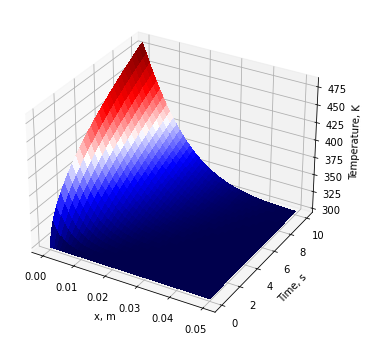

In [7]:
pp.evolutionField(T)

We can also check the temperature evolution for some specific locations, as there are thermal couples. <br>
Simply create a list of locations you want to check, and then pass the T and positions into the thermalCouplePlot() function.

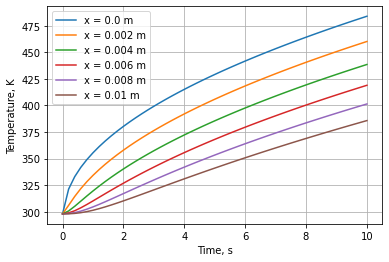

In [8]:
positions = [0, 0.002, 0.004, 0.006, 0.008, 0.01]
pp.thermalCouplePlot(T, positions)

We can futher check how the temperature is distributed over the domain at different times. Simply create a list of timings you want, and pass the T and times to the temperatureDistribution functions.

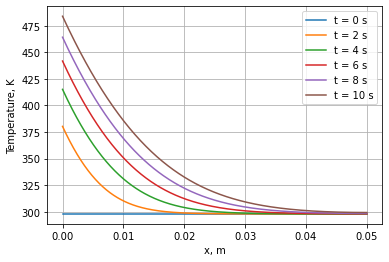

In [9]:
times = [0, 2, 4, 6, 8, 10]
pp.temperatureDistribution(T, times)